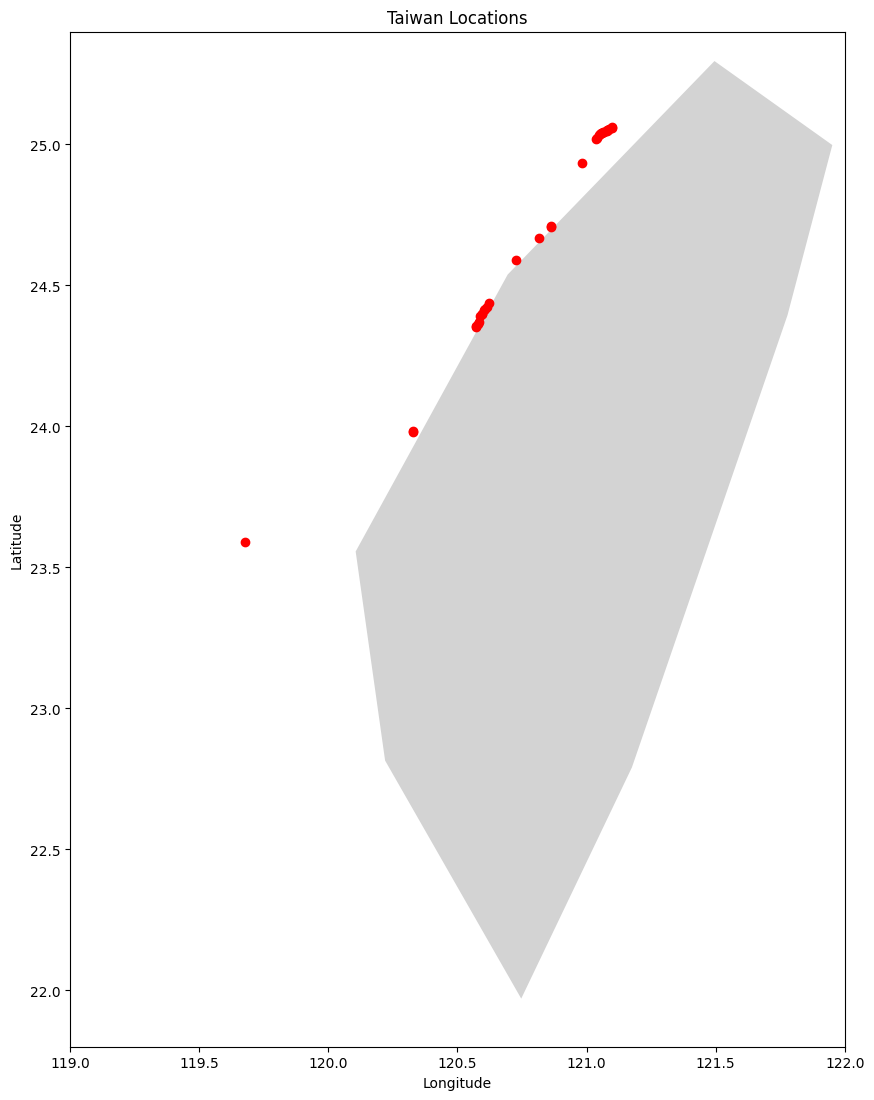

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
# 台灣的經緯度邊界
taiwan_bounds = {
    'west': 119,
    'east': 122,
    'south': 21.8,
    'north': 25.4
}

# 經緯度資料
data = [
    (25.063178, 121.099614),
    (25.059722, 121.096915),
    (25.053779, 121.086524),
    (25.051099, 121.082825),
    (25.049386, 121.080078),
    (25.047311, 121.077173),
    (25.043361, 121.06612),
    (25.042342, 121.063176),
    (25.040665, 121.058557),
    (25.038752, 121.05592),
    (25.036749, 121.052847),
    (25.031605, 121.046374),
    (25.021752, 121.039039),
    (25.020511, 121.036382),
    (24.93468, 120.982352),
    (24.709631, 120.863221),
    (24.705512, 120.86121),
    (24.667418, 120.817),
    (24.591349, 120.725205),
    (24.43690343, 120.6218744),
    (24.42229973, 120.6132893),
    (24.41751835, 120.6078507),
    (24.41170149, 120.6035794),
    (24.398728, 120.597142),
    (24.39813414, 120.5946397),
    (24.3926283, 120.588663),
    (24.37088052, 120.583292),
    (24.36425116, 120.5793118),
    (24.35598741, 120.5730844),
    (24.353799, 120.570811),
    (23.985172, 120.329242),
    (23.98097483, 120.3276329),
    (23.589572, 119.675862)
]

# 創建 DataFrame
df = pd.DataFrame(data, columns=['Latitude', 'Longitude'])

# 繪製台灣地圖
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
taiwan = world[(world.name == "Taiwan")]

# 繪製地圖和點
fig, ax = plt.subplots(figsize=(10, 15))
taiwan.plot(ax=ax, color='lightgray')

# 標註經緯度點
plt.scatter(df['Longitude'], df['Latitude'], color='red', marker='o')
plt.title('Taiwan Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(taiwan_bounds['west'], taiwan_bounds['east'])
plt.ylim(taiwan_bounds['south'], taiwan_bounds['north'])

# 顯示地圖
plt.show()


In [5]:
import pandas as pd
import folium

# 更新資料包含狀態和比數
data = [
    (25.063178, 121.099614, '', 0, ''),
    (25.059722, 121.096915, '33', 0, ''),
    (25.053779, 121.086524, '36', 0, ''),
    (25.051099, 121.082825, '37', 0, ''),
    (25.049386, 121.080078, '72', 0, ''),
    (25.047311, 121.077173, '73', 0, ''),
    (25.043361, 121.06612, '', 0, ''),
    (25.042342, 121.063176, '', 0, ''),
    (25.040665, 121.058557, '', 0, ''),
    (25.038752, 121.05592, '', 0, ''),
    (25.036749, 121.052847, '', 0, ''),
    (25.031605, 121.046374, '30', 0, ''),
    (25.021752, 121.039039, '', 0, ''),
    (25.020511, 121.036382, '25', 0, ''),
    (24.93468, 120.982352, '', 0, ''),
    (24.709631, 120.863221, '8', 0, 'FALSE'),
    (24.705512, 120.86121, '9', 20, 'FALSE'),
    (24.667418, 120.817, '', 0, ''),
    (24.591349, 120.725205, '', 0, ''),
    (24.57410325606123, 120.70908162111162, '18', 21, 'TRUE'),
    (24.43690343, 120.6218744, '', 20, 'FALSE'),
    (24.42229973, 120.6132893, '24', 20, 'FALSE'),
    (24.41751835, 120.6078507, '', 20, 'FALSE'),
    (24.41170149, 120.6035794, '25', 0, ''),
    (24.398728, 120.597142, '34', 0, ''),
    (24.39813414, 120.5946397, '9', 0, ''),
    (24.3926283, 120.588663, '27', 0, ''),
    (24.37088052, 120.583292, '15', 9, ''),
    (24.36425116, 120.5793118, '16', 10, 'FALSE'),
    (24.35598741, 120.5730844, '17', 10, 'FALSE'),
    (24.353799, 120.570811, '18', 10, 'FALSE'),
    (24.3225345, 120.4408062, '4', 20, 'TRUE'),
    (24.3325345, 120.4408062, '08-01', 20, 'TRUE'),
    (24.3425345, 120.4408062, '22a', 20, 'TRUE'),
    (23.985172, 120.329242, '王功08', 10, 'FALSE'),
    (23.98097483, 120.3276329, '王功09', 10, 'FALSE'),
    (23.589572, 119.675862, '', 0, '')
]

# 創建 DataFrame
df_updated_v2 = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'WindTurbineID', 'Count', 'Status'])

# 創建地圖中心於台灣
m = folium.Map(location=[23.5, 121], zoom_start=7)

# 添加標註點，根據狀態變更顏色
for idx, row in df_updated_v2.iterrows():
    color = 'black'
    if row['Status'] == "TRUE":
        color = 'green'
    elif row['Status'] == "FALSE":
        color = 'red'
    
    popup_text = f"Wind Turbine ID: {row['WindTurbineID']}<br>Count: {row['Count']}"
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color=color)
    ).add_to(m)

# 保存地圖到文件
file_path_v2 = 'taiwan_map_with_turbine_status.html'
m.save(file_path_v2)

file_path_v2


'taiwan_map_with_turbine_status.html'